In [1]:
!pip install pandas matplotlib seaborn scikit-learn gdown


In [2]:
!gdown --id 1wnSemvML-WOykhHVZpIOuFaEMuaGK8aF


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1wnSemvML-WOykhHVZpIOuFaEMuaGK8aF
From (redirected): https://drive.google.com/uc?id=1wnSemvML-WOykhHVZpIOuFaEMuaGK8aF&confirm=t&uuid=8289434f-43d4-4137-ae9a-08e9a486c077
To: /content/flights.csv
100% 592M/592M [00:09<00:00, 63.8MB/s]


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [4]:
flights_data = pd.read_csv('/content/flights.csv')

<ipython-input-4-f9551fdfe6ab>:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights_data = pd.read_csv('/content/flights.csv')


In [5]:
flights_data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#lets take a segment of this data for now
flights_seg = flights_data[0:150000]
flights_seg

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2015,1,10,6,EV,4607,N15572,XNA,IAH,1504,...,1735.0,46.0,0,0,NaN,0.0,0.0,0.0,46.0,0.0
149996,2015,1,10,6,WN,4388,N7723E,ATL,DAL,1505,...,1623.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
149997,2015,1,10,6,WN,2903,N218WN,ATL,DCA,1505,...,1634.0,-6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
149998,2015,1,10,6,WN,4519,N436WN,ATL,MCO,1505,...,1627.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
flights_seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 150000 non-null  int64  
 1   MONTH                150000 non-null  int64  
 2   DAY                  150000 non-null  int64  
 3   DAY_OF_WEEK          150000 non-null  int64  
 4   AIRLINE              150000 non-null  object 
 5   FLIGHT_NUMBER        150000 non-null  int64  
 6   TAIL_NUMBER          149693 non-null  object 
 7   ORIGIN_AIRPORT       150000 non-null  object 
 8   DESTINATION_AIRPORT  150000 non-null  object 
 9   SCHEDULED_DEPARTURE  150000 non-null  int64  
 10  DEPARTURE_TIME       146099 non-null  float64
 11  DEPARTURE_DELAY      146099 non-null  float64
 12  TAXI_OUT             145976 non-null  float64
 13  WHEELS_OFF           145976 non-null  float64
 14  SCHEDULED_TIME       150000 non-null  float64
 15  ELAPSED_TIME     

In [8]:
#year column is unneccesary since the data is bounded to 2015 but day and month are important
delay =[]
for row in flights_seg['ARRIVAL_DELAY']:
    if row > 60:
        delay.append(3)
    elif row > 30:
        delay.append(2)
    elif row > 15:
        delay.append(1)
    else:
        delay.append(0)
flights_seg['delay'] = delay

<ipython-input-8-ec8041458246>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_seg['delay'] = delay


In [9]:
# 0 = On time/ before time/ not more than 15 mins of delay
# 1 = more than 15 mins and less than 30 mins of delay
# 2 = more than 30 mins and less than 1 hr of delay
# 3 = more than an hour of delay
flights_seg.value_counts('delay')

,count
delay,
0,104480
1,15460
3,15397
2,14663


In [10]:
import seaborn as sns

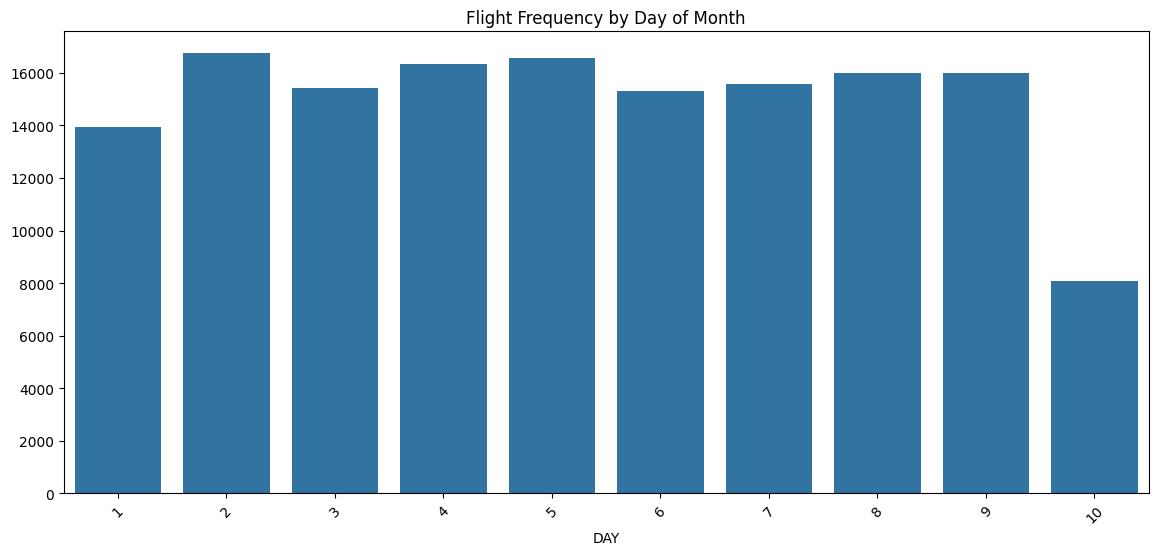

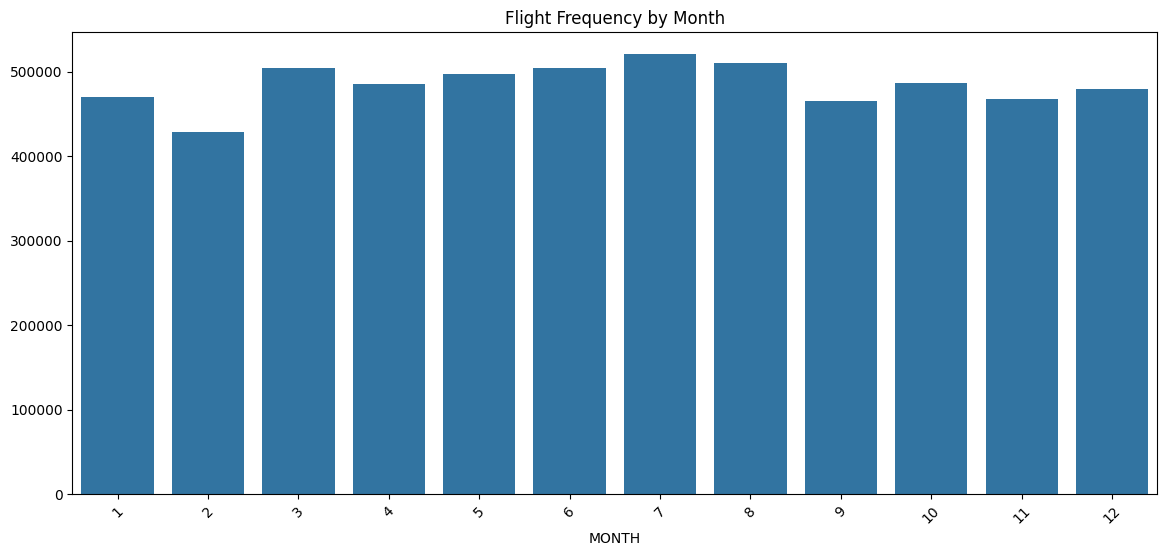

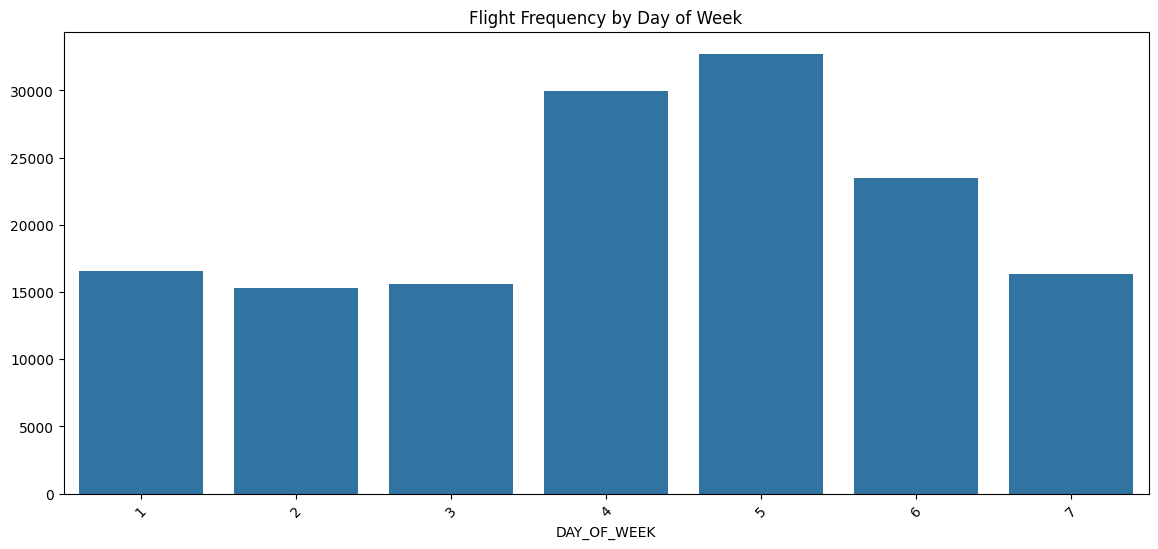

In [11]:
def plot_bar(group, title):
    plt.figure(figsize=(14,6))
    sns.barplot(x=group.index,y=group.values)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()
plot_bar(flights_seg.value_counts('DAY'), 'Flight Frequency by Day of Month')
plot_bar(flights_data.value_counts('MONTH'), 'Flight Frequency by Month')
plot_bar(flights_seg.value_counts('DAY_OF_WEEK'), 'Flight Frequency by Day of Week')


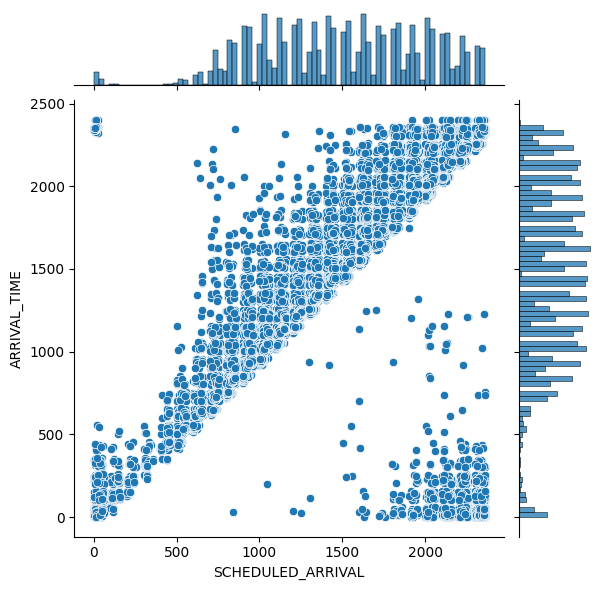

In [13]:
sns.jointplot(data=flights_seg, x="SCHEDULED_ARRIVAL", y="ARRIVAL_TIME")

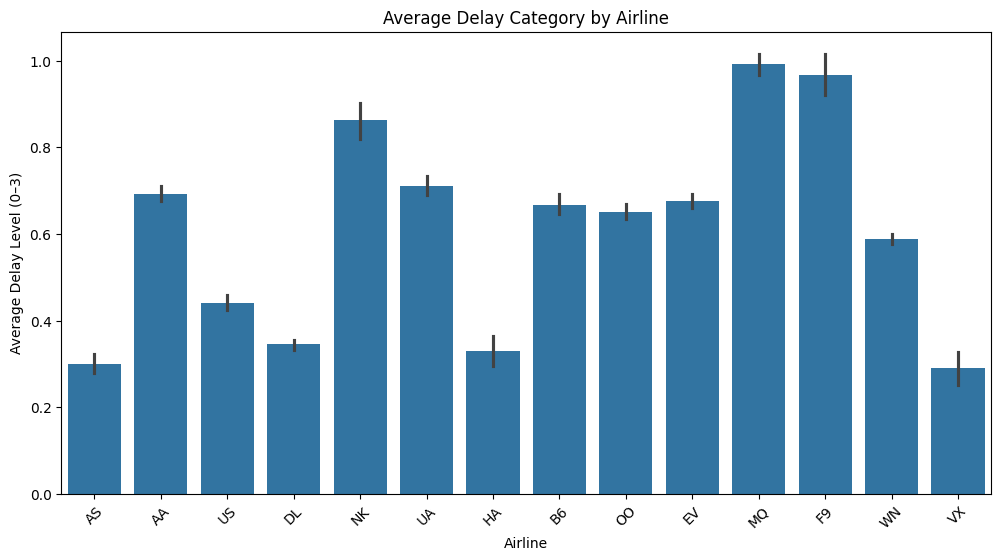

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(data=flights_seg, x="AIRLINE", y="delay", estimator="mean")
plt.title("Average Delay Category by Airline")
plt.ylabel("Average Delay Level (0–3)")
plt.xlabel("Airline")
plt.xticks(rotation=45)
plt.show()


In [15]:
Flight_data_delay =[]
for row in flights_data['ARRIVAL_DELAY']:
    if row > 60:
        Flight_data_delay.append(3)
    elif row > 30:
        Flight_data_delay.append(2)
    elif row > 15:
        Flight_data_delay.append(1)
    else:
        Flight_data_delay.append(0)

flights_data['Delay'] = Flight_data_delay

In [16]:
flights_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 32 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [17]:
flights_data=flights_data.drop(['YEAR','FLIGHT_NUMBER','AIRLINE','DISTANCE','TAIL_NUMBER','TAXI_OUT','SCHEDULED_TIME','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME',
                                'AIR_TIME','WHEELS_ON','DAY_OF_WEEK','TAXI_IN','CANCELLATION_REASON','ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_TIME',
                                'ARRIVAL_DELAY', "CANCELLED"], axis=1)

In [18]:
flights_data.describe()

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,Delay
count,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,5.819079e+06
mean,6.524085e+00,1.570459e+01,1.329602e+03,9.370158e+00,1.493808e+03,2.609863e-03,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00,3.394501e-01
std,3.405137e+00,8.783425e+00,4.837518e+02,3.708094e+01,5.071647e+02,5.102012e-02,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01,8.130325e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,8.000000e+00,9.170000e+02,-5.000000e+00,1.110000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.000000e+00,1.600000e+01,1.325000e+03,-2.000000e+00,1.520000e+03,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00
75%,9.000000e+00,2.300000e+01,1.730000e+03,7.000000e+00,1.918000e+03,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00,0.000000e+00
max,1.200000e+01,3.100000e+01,2.359000e+03,1.988000e+03,2.400000e+03,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03,3.000000e+00


In [19]:
flights_data.isna().sum()


,0
MONTH,0
DAY,0
SCHEDULED_DEPARTURE,0
DEPARTURE_DELAY,86153
SCHEDULED_ARRIVAL,0
DIVERTED,0
AIR_SYSTEM_DELAY,4755640
SECURITY_DELAY,4755640
AIRLINE_DELAY,4755640
LATE_AIRCRAFT_DELAY,4755640


In [20]:
flights_data['DEPARTURE_DELAY'] = flights_data['DEPARTURE_DELAY'].fillna(flights_data['DEPARTURE_DELAY'].mean())

delay_reason_cols = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
flights_data[delay_reason_cols] = flights_data[delay_reason_cols].fillna(0)

In [21]:
flights_data.head(25)

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,Delay
0,1,1,5,-11.0,430,0,0.0,0.0,0.0,0.0,0.0,0
1,1,1,10,-8.0,750,0,0.0,0.0,0.0,0.0,0.0,0
2,1,1,20,-2.0,806,0,0.0,0.0,0.0,0.0,0.0,0
3,1,1,20,-5.0,805,0,0.0,0.0,0.0,0.0,0.0,0
4,1,1,25,-1.0,320,0,0.0,0.0,0.0,0.0,0.0,0
5,1,1,25,-5.0,602,0,0.0,0.0,0.0,0.0,0.0,0
6,1,1,25,-6.0,526,0,0.0,0.0,0.0,0.0,0.0,0
7,1,1,30,14.0,803,0,0.0,0.0,0.0,0.0,0.0,0
8,1,1,30,-11.0,545,0,0.0,0.0,0.0,0.0,0.0,0
9,1,1,30,3.0,711,0,0.0,0.0,0.0,0.0,0.0,0


<Axes: >

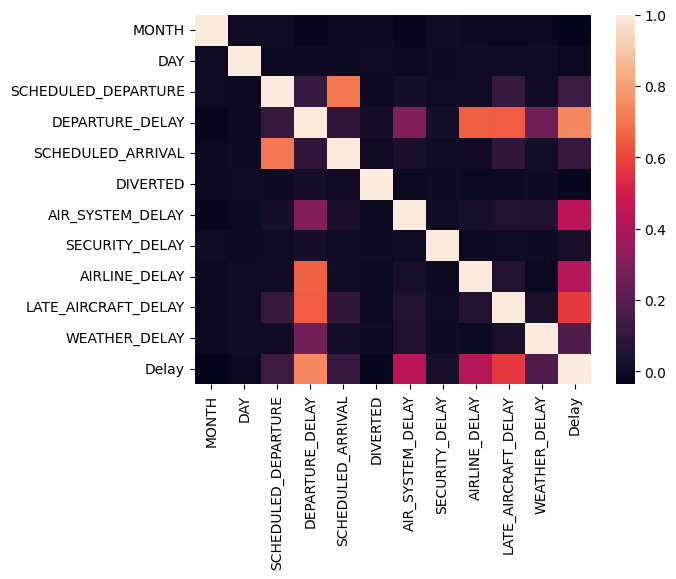

In [22]:
sns.heatmap(flights_data.corr())

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [27]:
data = flights_data.values
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

dt_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_clf = dt_clf.fit(X_train,y_train)

Accuracy: 0.9652
F1 Score (Macro): 0.8763
F1 Score (Weighted): 0.9653
F1 Score (Per Class): [0.99294419 0.8086762  0.78988108 0.91350286]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99   1438560
         1.0       0.89      0.74      0.81    116893
         2.0       0.72      0.88      0.79     94327
         3.0       0.95      0.88      0.91     95944

    accuracy                           0.97   1745724
   macro avg       0.89      0.87      0.88   1745724
weighted avg       0.97      0.97      0.97   1745724



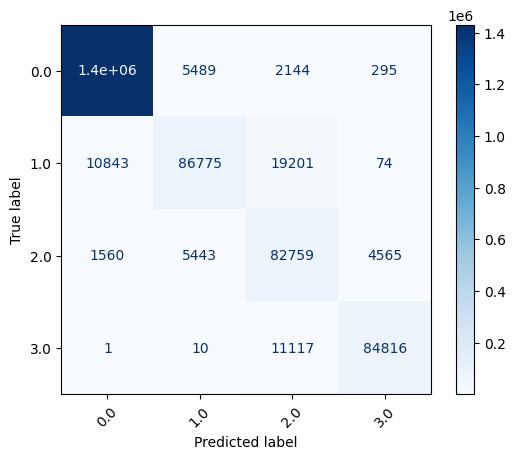

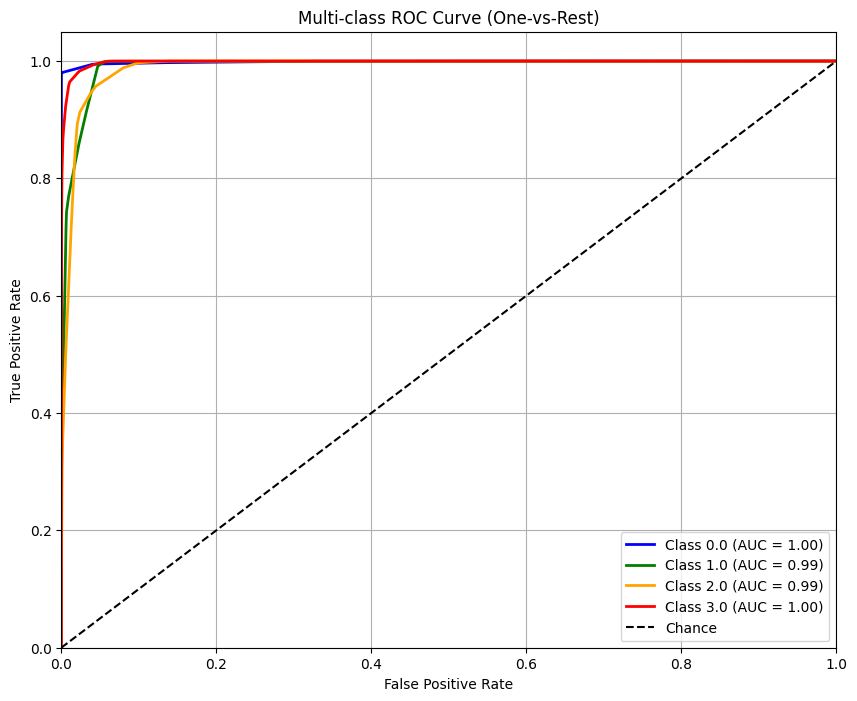

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report, f1_score, accuracy_score,
    ConfusionMatrixDisplay, roc_curve, auc
)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# 3. Predict
y_pred = dt_clf.predict(X_test)

# 4. Evaluation metrics
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_clf.classes_)
disp.plot(cmap="Blues", xticks_rotation=45)

f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')
f1_per_class = f1_score(y_test, y_pred, average=None)
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"F1 Score (Macro): {f1_macro:.4f}")
print(f"F1 Score (Weighted): {f1_weighted:.4f}")
print("F1 Score (Per Class):", f1_per_class)
print("\nClassification Report:\n", report)

# 5. ROC and AUC (Multiclass - One-vs-Rest)
# Binarize labels
classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)
y_score = dt_clf.predict_proba(X_test)

# Compute ROC and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'orange', 'red']
for i, color in zip(range(len(classes)), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})', lw=2)

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-class ROC Curve (One-vs-Rest)")
plt.legend(loc="lower right")
plt.grid()
plt.show()


<Axes: ylabel='count'>

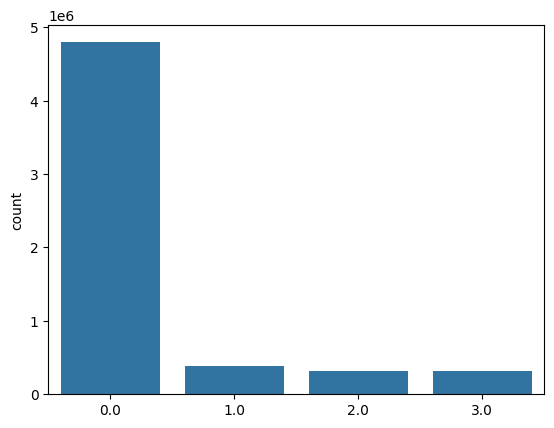

In [29]:
import seaborn as sns
sns.countplot(x=y)


RANDOM FOREST

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98   1438560
         1.0       0.60      0.85      0.70    116893
         2.0       0.65      0.71      0.68     94327
         3.0       0.95      0.88      0.91     95944

    accuracy                           0.94   1745724
   macro avg       0.80      0.85      0.82   1745724
weighted avg       0.95      0.94      0.94   1745724



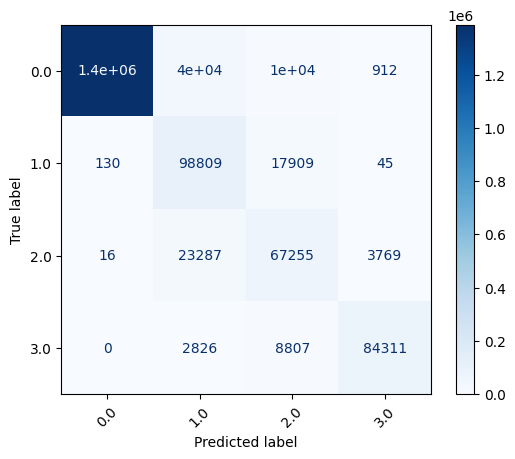

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(class_weight='balanced', n_estimators=10, max_depth=5, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred_rf))
ConfusionMatrixDisplay.from_estimator(rf_clf, X_test, y_test, cmap="Blues", xticks_rotation=45)


Accuracy: 0.9384
F1 Score (Macro): 0.8184
F1 Score (Weighted): 0.9430
F1 Score (Per Class): [0.98201499 0.70218489 0.67777565 0.91156389]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.96      0.98   1438560
         1.0       0.60      0.85      0.70    116893
         2.0       0.65      0.71      0.68     94327
         3.0       0.95      0.88      0.91     95944

    accuracy                           0.94   1745724
   macro avg       0.80      0.85      0.82   1745724
weighted avg       0.95      0.94      0.94   1745724



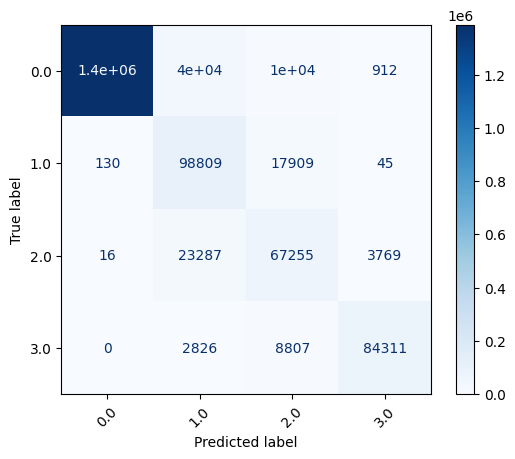

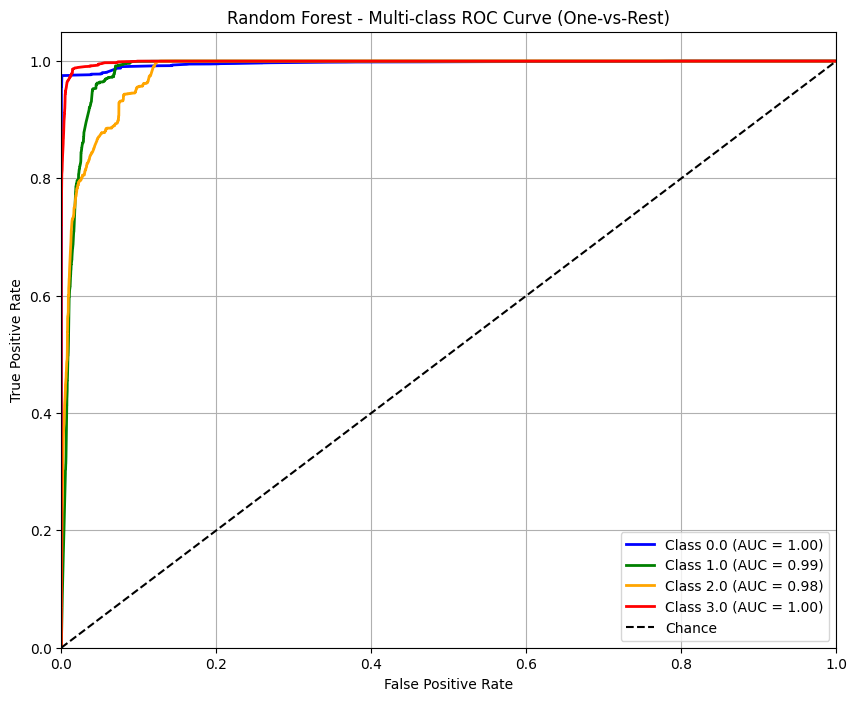

In [31]:
# 3. Predict
y_pred = rf_clf.predict(X_test)

# 4. Evaluation Metrics
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf.classes_)
disp.plot(cmap="Blues", xticks_rotation=45)

f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')
f1_per_class = f1_score(y_test, y_pred, average=None)
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"F1 Score (Macro): {f1_macro:.4f}")
print(f"F1 Score (Weighted): {f1_weighted:.4f}")
print("F1 Score (Per Class):", f1_per_class)
print("\nClassification Report:\n", report)

# 5. ROC and AUC (Multiclass - One-vs-Rest)
classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)
y_score = rf_clf.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 6. Plot ROC Curves
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'orange', 'red']
for i, color in zip(range(len(classes)), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})', lw=2)

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest - Multi-class ROC Curve (One-vs-Rest)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(class_weight='balanced', n_estimators=100, max_depth=5, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

Accuracy: 0.9532
F1 Score (Macro): 0.8458
F1 Score (Weighted): 0.9555
F1 Score (Per Class): [0.98952769 0.76287304 0.72410172 0.90671996]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99   1438560
         1.0       0.66      0.90      0.76    116893
         2.0       0.74      0.71      0.72     94327
         3.0       0.96      0.86      0.91     95944

    accuracy                           0.95   1745724
   macro avg       0.84      0.86      0.85   1745724
weighted avg       0.96      0.95      0.96   1745724



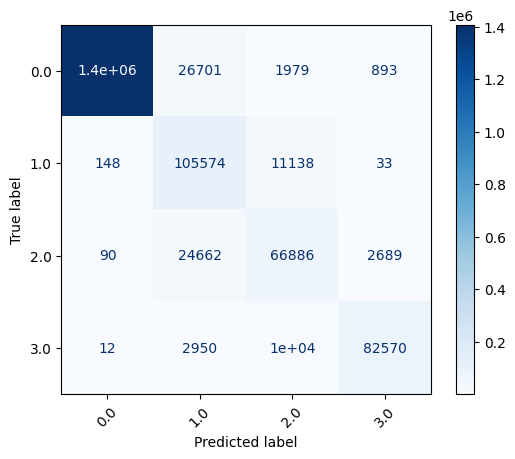

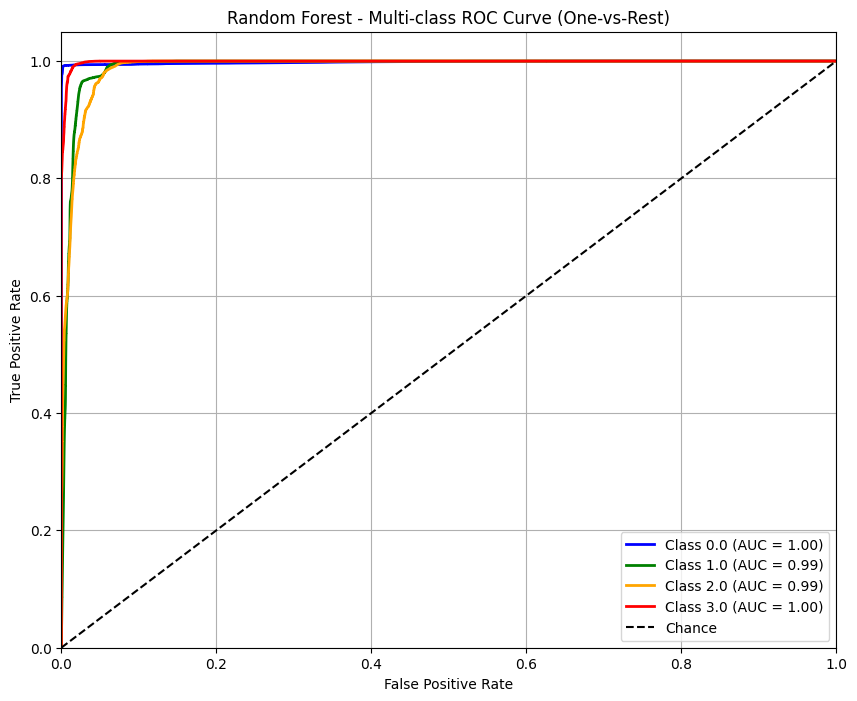

In [33]:
# 3. Predict
y_pred = rf_clf.predict(X_test)

# 4. Evaluation Metrics
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf.classes_)
disp.plot(cmap="Blues", xticks_rotation=45)

f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')
f1_per_class = f1_score(y_test, y_pred, average=None)
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"F1 Score (Macro): {f1_macro:.4f}")
print(f"F1 Score (Weighted): {f1_weighted:.4f}")
print("F1 Score (Per Class):", f1_per_class)
print("\nClassification Report:\n", report)

# 5. ROC and AUC (Multiclass - One-vs-Rest)
classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)
y_score = rf_clf.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 6. Plot ROC Curves
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'orange', 'red']
for i, color in zip(range(len(classes)), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})', lw=2)

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest - Multi-class ROC Curve (One-vs-Rest)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

#XGBOOST

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:54:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1438560
         1.0       1.00      1.00      1.00    116893
         2.0       1.00      1.00      1.00     94327
         3.0       1.00      1.00      1.00     95944

    accuracy                           1.00   1745724
   macro avg       1.00      1.00      1.00   1745724
weighted avg       1.00      1.00      1.00   1745724



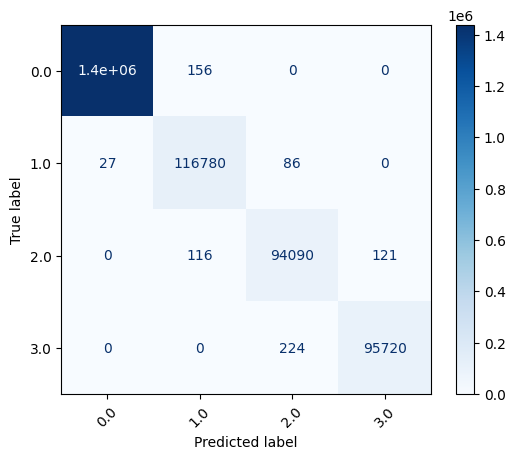

In [34]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', scale_pos_weight=1)
xgb_clf.fit(X_train, y_train)

y_pred_xgb = xgb_clf.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred_xgb))
ConfusionMatrixDisplay.from_estimator(xgb_clf, X_test, y_test, cmap="Blues", xticks_rotation=45)


Accuracy: 0.9996
F1 Score (Macro): 0.9984
F1 Score (Weighted): 0.9996
F1 Score (Per Class): [0.99993639 0.99835431 0.99710163 0.99820111]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1438560
         1.0       1.00      1.00      1.00    116893
         2.0       1.00      1.00      1.00     94327
         3.0       1.00      1.00      1.00     95944

    accuracy                           1.00   1745724
   macro avg       1.00      1.00      1.00   1745724
weighted avg       1.00      1.00      1.00   1745724



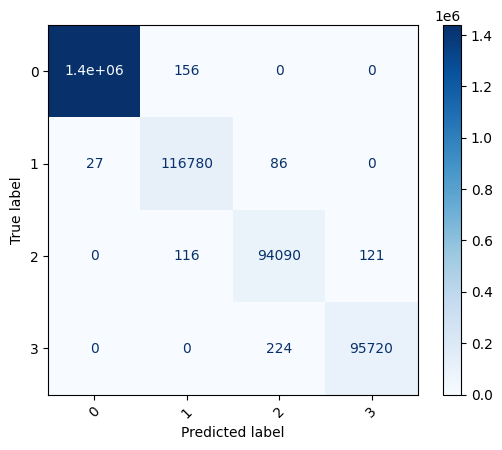

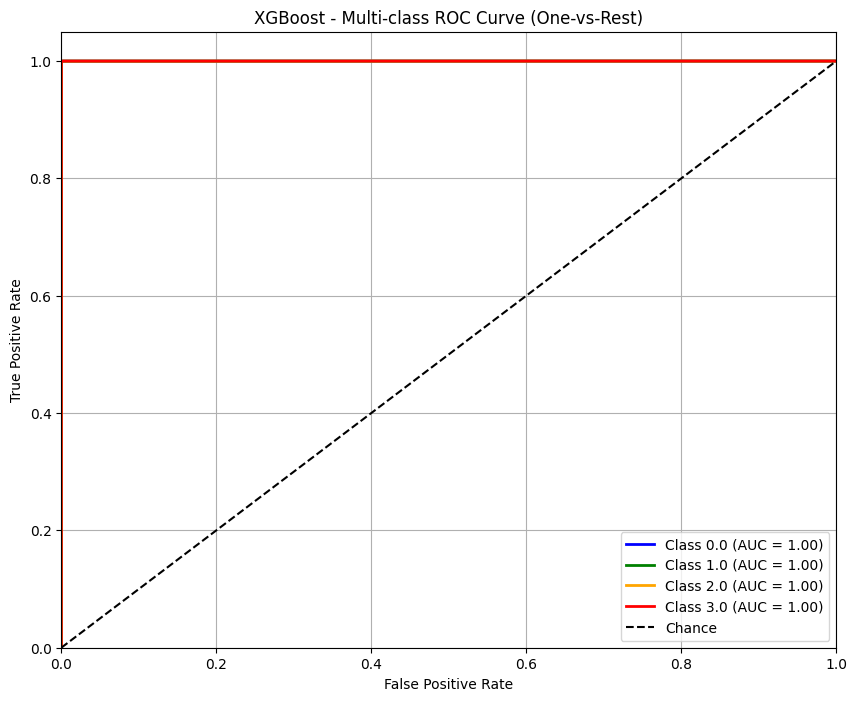

In [35]:
# 3. Predict
y_pred = xgb_clf.predict(X_test)

# 4. Evaluation Metrics
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_clf.classes_)
disp.plot(cmap="Blues", xticks_rotation=45)

f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')
f1_per_class = f1_score(y_test, y_pred, average=None)
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"F1 Score (Macro): {f1_macro:.4f}")
print(f"F1 Score (Weighted): {f1_weighted:.4f}")
print("F1 Score (Per Class):", f1_per_class)
print("\nClassification Report:\n", report)

# 5. ROC and AUC (Multiclass - One-vs-Rest)
classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)
y_score = xgb_clf.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 6. Plot ROC Curves
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'orange', 'red']
for i, color in zip(range(len(classes)), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})', lw=2)

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost - Multi-class ROC Curve (One-vs-Rest)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

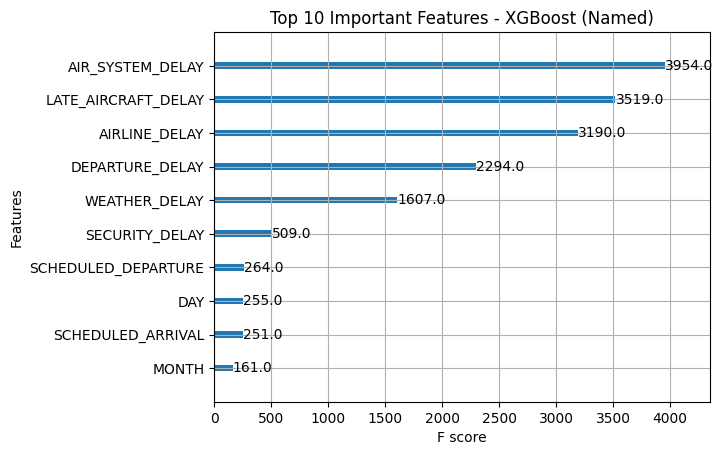

In [37]:
import numpy as np
from xgboost import plot_importance

# Get your feature names from the original DataFrame (excluding the label)
feature_names = flights_data.columns[:-1]  # assuming 'Delay' is the last column

# Plot with actual feature names
plot_importance(xgb_clf, max_num_features=10)
ax = plt.gca()
ax.set_yticklabels([feature_names[int(label.get_text()[1:])] for label in ax.get_yticklabels()])
plt.title("Top 10 Important Features - XGBoost (Named)")
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
import numpy as np

# Re-initialize your model
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Perform 5-fold cross-validation (you can change cv=5 to something else like 3 or 10)
scores = cross_val_score(xgb_clf, X, y, cv=5, scoring='f1_macro')

print("F1 Macro Scores for each fold:", scores)
print("Average F1 Macro Score:", np.mean(scores))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:00:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:04:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:09:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:13:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:17:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

F1 Macro Scores for each fold: [0.99803453 0.99833388 0.99776113 0.99779507 0.99773627]
Average F1 Macro Score: 0.9979321762631985
